**Using Linear Regression**

In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np 
import matplotlib.pyplot as plt

### Performing data preprocessing and cleaning

In [33]:
df=pd.read_csv("day - day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
print(df.shape)
print(df.columns)

(731, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


Checking for Missing Values

In [35]:
print(df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Checking for Duplicate values in the dataset

In [36]:
print(df.duplicated().sum())


0


Checking for outliers

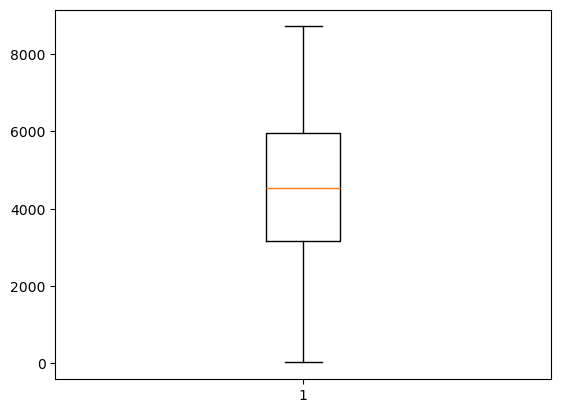

In [37]:
plt.boxplot(df['cnt'])
plt.show()


`cnt` is dropped from X cause that is what we want to predict, registered and casual is also dropped because the sum of both will lead to `cnt` which leads to data leakage. Now X only has features

Y has what we want to predict

In [38]:
X=df.drop(["cnt","dteday","registered","casual"],axis=1)
Y=df["cnt"]

Dataset is split to training and testing dataset to train the model better

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

Now, the model is trained using the training dataset and the model finds the best fitting linear relationship between X and Y

In [40]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

`Y_pred` will store all predictions the model makes for X_test 

In [41]:
Y_pred=lr.predict(X_test)

R²-Scores how well line explains the variation in data.Ranges between 0 to 1.

MAE-Mean Absolute Error is the avergae of absolute difference between predicted and actual values

RMSE-Root Mean Sqaured Error is the square root of the average squared differences between predicted and actual values. Larger errors have more impact

In [42]:
print("R²:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

R²: 0.8112069006017121
MAE: 688.5329352801747
RMSE: 914.8831620767785


### Training model for Casual and Registered users individually

In [43]:
X_casual=df.drop(["cnt","registered","casual","dteday"],axis=1)
Y_casual=df["casual"]

In [44]:
X_registered=df.drop(["cnt","casual","registered","dteday"],axis=1)
Y_registered=df["registered"]

Split the casual and registered datasets into training and testing dataset

In [45]:
X_train_casual,X_test_casual,Y_train_casual,Y_test_casual=train_test_split(X_casual,Y_casual,random_state=0)

In [46]:
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg=train_test_split(X_registered,Y_registered,random_state=0)

Now, the model is trained using the training dataset and the model finds the best fitting linear relationship between X and Y

In [47]:
lr_casual = LinearRegression()
lr_registered = LinearRegression()

In [48]:
lr_casual.fit(X_train_casual,Y_train_casual)
lr_registered.fit(X_train_reg,Y_train_reg)

LinearRegression()

Storing all the values predicted by the model to `pred_casual` and `pred_registered`

In [49]:
pred_casual=lr_casual.predict(X_test_casual)
pred_registered=lr_registered.predict(X_test_reg)

Check how accurate the predictions are for casual and registered, seperately

In [50]:
print("R²:", r2_score(Y_test_casual,pred_casual))
print("MAE:", mean_absolute_error(Y_test_casual,pred_casual))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_casual,pred_casual)))

print("R²:", r2_score(Y_test_reg,pred_registered))
print("MAE:", mean_absolute_error(Y_test_reg,pred_registered))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_reg,pred_registered)))

R²: 0.6738879648737408
MAE: 307.68307712654666
RMSE: 416.6988407662682
R²: 0.8405381226770263
MAE: 521.9429911779417
RMSE: 670.2570237999702


Adding and checking how accurate the predictions are for `cnt`

In [51]:
cnt_pred=pred_casual + pred_registered

print("Total R²:", r2_score(Y_test,cnt_pred))
print("Total MAE:", mean_absolute_error(Y_test,cnt_pred))
print("Total RMSE:", np.sqrt(mean_squared_error(Y_test,cnt_pred)))

Total R²: 0.8112069006017122
Total MAE: 688.5329352801748
Total RMSE: 914.8831620767785
